In [1]:
import benchmark_functions as bf
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt


In [2]:
def backtracking_line_search(f, myfprime, xk, pk, alpha=1.0, rho=0.5, c=0.0001, maxiter=100):
        assert alpha > 0
        assert 0 < rho < 1
        assert 0 < c < 1

        for _ in range(maxiter):
            if f(xk + alpha * pk) <= f(xk) + c * alpha * myfprime(xk) @ pk:
                break
            alpha *= rho

        return alpha

In [6]:
def is_positive_definite(x):
    return np.all(np.linalg.eigvals(x) > 0)


def BFGS(x, f, g, h, max_iteration=1000):
    d = len(x)
    B_tmp = h(x)
    B = B_tmp if is_positive_definite(B_tmp) else np.eye(d)
    iteration = 0
    epsilon = 1e-5
    data = [f(x)]
    gradient = g(x)
    H = np.linalg.inv(B)
    p0 = -1 * np.dot(H, gradient)
    alhpa0 = backtracking_line_search(f, g, x, p0)
    #6.17
    while iteration < max_iteration:
        if np.linalg.norm(gradient) < epsilon:
            break
        #p = -1 * np.linalg.solve(B, gradient)
        p = -1 * np.dot(H, gradient)
        if iteration == 0:
            p = alhpa0 * p
        alpha, _, _, _, _, _ = opt.line_search(f=f, myfprime=g, xk=x, pk=p)
        # if alpha is None:
        #     alpha = my_opt.backtracking_line_search(f, g, x, p)
        s = alpha * p
        x_new = x + s
        gradient_new = g(x_new)
        y = gradient_new - gradient
        if np.dot(s, y) >= 0:
            rho = 1 / (y @ s)
            H = (np.identity(d) - rho * np.outer(s, y)) @ H @ (
                    np.identity(d) - rho * np.outer(y, s)) + rho * np.outer(s, s)
            # 6.19
            # Bs = np.dot(B, s)
            # ys = np.dot(y, s)
            # sBs = np.dot(np.dot(s, B), s)
            # B = B + np.outer(y, y) / ys - np.outer(Bs, Bs) / sBs
        data.append(f(x_new))
        iteration += 1
        x = x_new
        gradient = gradient_new
    final_y = f(x)
    #final coordinate,final f(x),number of iteration,data for convergence line
    return x, final_y, iteration, data


def plot(xs):
    plt.xlabel("n_iteration")
    plt.ylabel("f(x)")
    plt.yscale("log")
    plt.plot(np.arange(len(xs)), xs)
    plt.show()

f1

final x: [0.00000000e+00 3.55271368e-15 0.00000000e+00]
final f(x):3.9913555480969773e-28
n_iteration:1


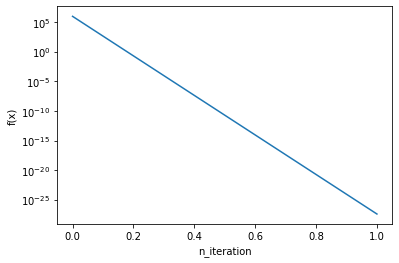

In [7]:
input_data1 = np.array([10, 20, 30])
f1_x, f1_final_y, f1_n_iteration, f1_convergence_line = BFGS(input_data1, bf.ellipsoid, bf.ellipsoid_gradient,
                                                             bf.ellipsoid_hessian)
print(f"final x: {f1_x}")
print(f"final f(x):{f1_final_y}")
print(f"n_iteration:{f1_n_iteration}")
plot(f1_convergence_line)

f2

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


final x: [1.00000009 1.00000018]
final f(x):8.704873821200932e-15
n_iteration:114


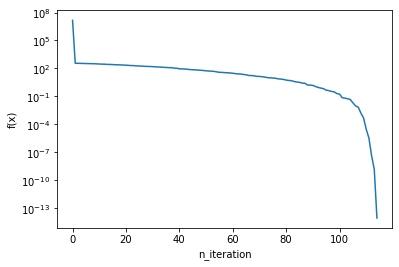

In [8]:
input_data2 = np.array([20, 20])
f2_x, f2_final_y, f2_n_iteration, f2_convergence_line = BFGS(input_data2, bf.rosenbrock_banana,
                                                             bf.rosenbrock_banana_gradient,
                                                             bf.rosenbrock_banana_hessian)
print(f"final x: {f2_x}")
print(f"final f(x):{f2_final_y}")
print(f"n_iteration:{f2_n_iteration}")
plot(f2_convergence_line)

f3

final x: [-5.62507490e-12 -6.72995875e-13 -1.26274578e-13  7.22317865e-13
 -2.35183302e-14]
final f(x):-9.210340371976182
n_iteration:64


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


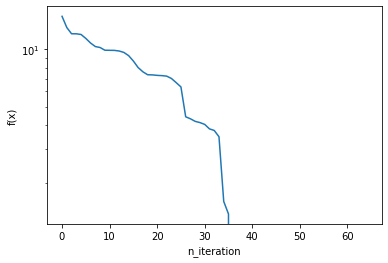

In [9]:
input_data3 = np.array([10, 20, 30, 40, 50])
f3_x, f3_final_y, f3_n_iteration, f3_convergence_line = BFGS(input_data3, bf.log_ellipsoid,
                                                             bf.log_ellipsoid_gradient, bf.log_ellipsoid_hessian)
print(f"final x: {f3_x}")
print(f"final f(x):{f3_final_y}")
print(f"n_iteration:{f3_n_iteration}")
plot(f3_convergence_line)

f4

final x: [0.0001912 0.0001912 0.0001912]
final f(x):1.8304879267771598e-07
n_iteration:8


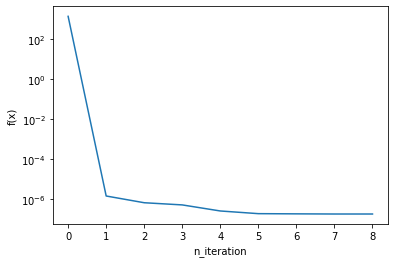

In [10]:
input_data4 = np.array([10, 20, 30])
f4_x, f4_final_y, f4_n_iteration, f4_convergence_line = BFGS(input_data4, bf.attractive_sector,
                                                             bf.attractive_sector_gradient,
                                                             bf.attractive_sector_hessian)
print(f"final x: {f4_x}")
print(f"final f(x):{f4_final_y}")
print(f"n_iteration:{f4_n_iteration}")
plot(f4_convergence_line)

f5

In [11]:
input_data5 = np.array([100, 200, 600])
f5_x, f5_final_y, f5_n_iteration, f5_convergence_line = BFGS(input_data5, bf.sum_different_powers,
                                                             bf.sum_different_powers_gradient,
                                                             bf.sum_different_powers_hessian)
print(f"final x: {f5_x}")
print(f"final f(x):{f5_final_y}")
print(f"n_iteration:{f5_n_iteration}")
plot(f5_convergence_line)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'